In [234]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [235]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#1latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandD|ata/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv')

In [236]:
print(confirmed_df.shape)
confirmed_df.head()

(262, 79)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


In [237]:
print(deaths_df.shape)
deaths_df.head()

(262, 79)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,4,6,6,7,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,8,10,10,11,15,15,16,17,20,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,26,29,31,35,44,58,86,105,130,152
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,3,6,8,12,14,15,16,17,18
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,2,2,2,2,2,2,2,2


In [238]:
print(recoveries_df.shape)
recoveries_df.head()

(248, 79)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,2,2,5,5,10,10,10,15
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,33,44,52,67,76,89,99,104
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,29,31,31,37,46,61,61,62,90,90
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,10,10,10,10,16,21,26
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,2,2


In [239]:
cols = confirmed_df.columns

In [240]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

In [241]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,0,0,0,0,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,0,0,0,0,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,0,0,0,0,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,0,0,0,0,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,0,0,0,0,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


In [242]:
confirmed_df[confirmed_df['Country/Region']=="India"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,...,887,987,1024,1251,1397,1998,2543,2567,3082,3588


In [243]:
dates=confirmed.columns

In [244]:

india_confirmed=[]
us_confirmed=[]
italy_confirmed=[]
france_confirmed=[]
spain_confirmed=[]
iran_confirmed=[]
india_recovered=[]
world_confirmed=[]
world_recovered=[]
world_death=[]

for i in dates:
    
    confirmed_sum = confirmed[i].sum()
    recovered_sum=recoveries[i].sum()
    death_sum=deaths[i].sum()

    
    
    
    world_confirmed.append(confirmed_sum)
    world_recovered.append(recovered_sum)
    world_death.append(death_sum)
    
    india_confirmed.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    italy_confirmed.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_confirmed.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_confirmed.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    iran_confirmed.append(confirmed_df[confirmed_df['Country/Region']=='Iran'][i].sum())
    france_confirmed.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())

In [245]:
def percentage_increase(data):
    pincr = []
    for i in range(len(data)):
        if i != 0:
            if((data[i]-data[i-1])==0 or data[i-1]==0):
                pincr.append(0)
            else:
                pincr.append(int((data[i]-data[i-1])/data[i-1]*100))
    return pincr 

In [246]:
pincr=percentage_increase([1,2,3,4,5])

india_per_increase=percentage_increase(india_confirmed)
italy_per_increase=percentage_increase(italy_confirmed)
spain_per_increase=percentage_increase(spain_confirmed)
us_per_increase=percentage_increase(us_confirmed)
world_per_increase=percentage_increase(world_confirmed)
world_per_recovered=percentage_increase(world_recovered)
world_per_death=percentage_increase(world_death)

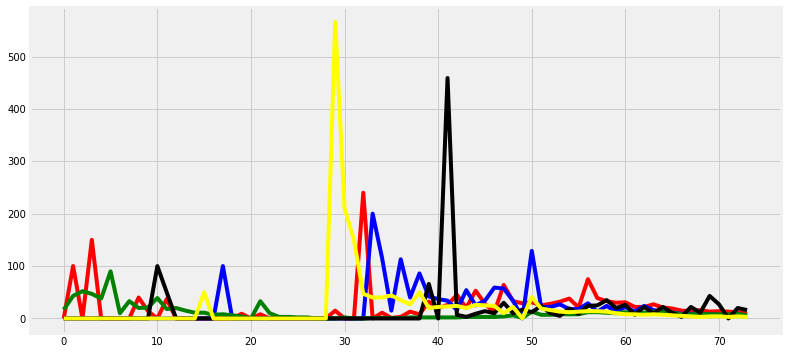

In [247]:
plt.figure(figsize=(12,6))
plt.plot(us_per_increase,'red')
plt.plot(spain_per_increase,'blue')
plt.plot(world_per_increase,'green')
plt.plot(india_per_increase,'black')
plt.plot(italy_per_increase,'yellow')

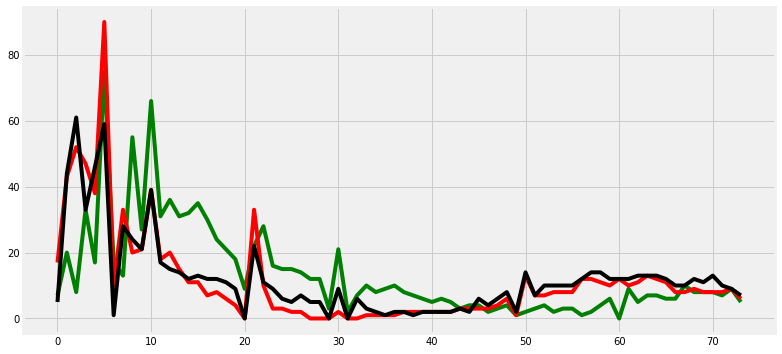

In [248]:
plt.figure(figsize=(12,6))
plt.plot(world_per_recovered,'green')
plt.plot(world_per_increase,"red")
plt.plot(world_per_death,'black')

In [249]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_per_increase = np.array(world_per_increase).reshape(-1, 1)
india_confirmed= np.array(india_confirmed).reshape(-1, 1)
world_per_death = np.array(world_per_death).reshape(-1, 1)
world_per_recovered = np.array(world_per_recovered).reshape(-1, 1)

In [250]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [251]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [252]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, india_confirmed, test_size=0.05, shuffle=False) 


C:\Users\adarsh\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


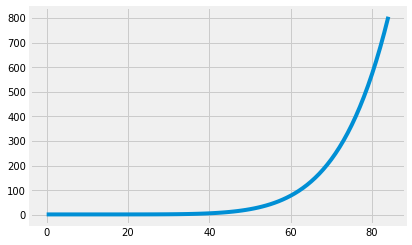

In [258]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=7, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

plt.plot(svm_pred)

MAE: 2655.0479503237184
MSE: 7208851.053670416


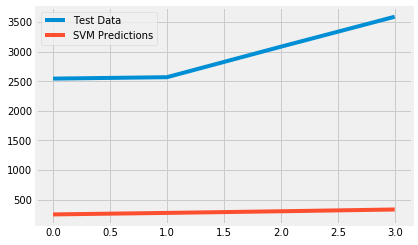

In [259]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)

plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [230]:
poly = PolynomialFeatures(degree=6)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

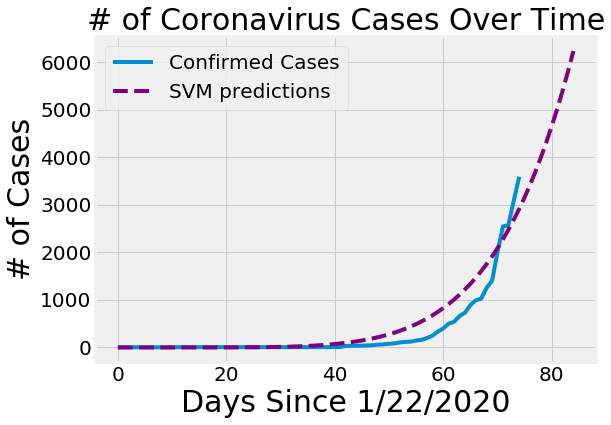

array([-2.53223358e+00, -2.53223357e+00, -2.53223291e+00, -2.53222596e+00,
       -2.53219079e+00, -2.53207036e+00, -2.53174620e+00, -2.53100460e+00,
       -2.52949518e+00, -2.52668206e+00, -2.52178742e+00, -2.51372758e+00,
       -2.50104153e+00, -2.48181198e+00, -2.45357888e+00, -2.41324534e+00,
       -2.35697618e+00, -2.28008879e+00, -2.17693661e+00, -2.04078501e+00,
       -1.86367966e+00, -1.63630738e+00, -1.34784952e+00, -9.85827730e-01,
       -5.35942261e-01,  1.80972431e-02,  6.94748515e-01,  1.51482092e+00,
        2.50166725e+00,  3.68138305e+00,  5.08301345e+00,  6.73876749e+00,
        8.68424002e+00,  1.09586411e+01,  1.36050329e+01,  1.66705742e+01,
        2.02067722e+01,  2.42697423e+01,  2.89204747e+01,  3.42251093e+01,
        4.02552175e+01,  4.70880918e+01,  5.48070431e+01,  6.35017049e+01,
        7.32683461e+01,  8.42101897e+01,  9.64377407e+01,  1.10069121e+02,
        1.25230411e+02,  1.42055999e+02,  1.60688939e+02,  1.81281317e+02,
        2.03994620e+02,  

In [257]:
plt.figure(figsize=(8, 6))
plt.plot(india_confirmed)
plt.plot(future_forcast, svm_pred*0.7+svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

svm_pred

In [203]:
poly_future_forcast 

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02, 7.29000000e+02],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03, 4.09600000e+03],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04],
       [1.00000000e+00, 6.00000000e+00, 3.60000000e+01, 2.16000000e+02,
        1.29600000e+03, 7.77600000e+03, 4.66560000e+04],
       [1.00000000e+00, 7.00000000e+00, 4.90000000e+01, 3.43000000e+02,
        2.40100000e+03, 1

In [204]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 625.2703137001572
MSE: 417201.9916377026


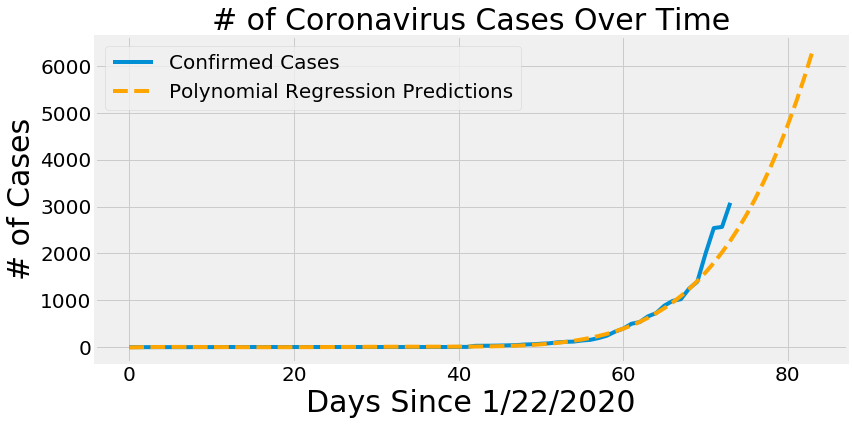

In [205]:
plt.figure(figsize=(12, 6))
plt.plot(adjusted_dates, india_confirmed)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [206]:
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.8s finished
C:\Users\adarsh\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           compute_score=False, copy_X=True,
                                           fit_intercept=False, lambda_1=1e-06,
                                           lambda_2=1e-06, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'lambda_2': [1e

In [207]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 621.0549550868666
MSE: 411385.86718887585


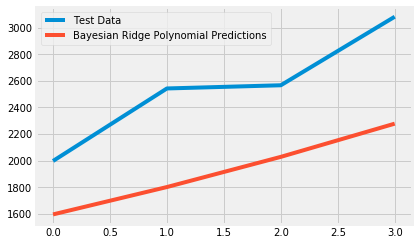

In [208]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

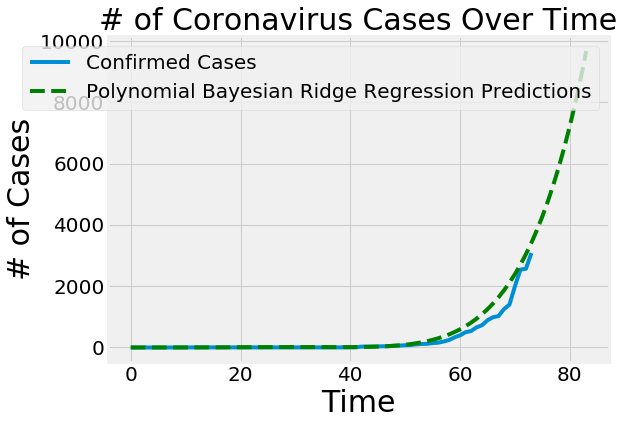

In [211]:
plt.figure(figsize=(8,6))
plt.plot(adjusted_dates, india_confirmed)
plt.plot(future_forcast, bayesian_pred*.5+bayesian_pred, linestyle='dashed', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Bayesian Ridge Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [214]:
bayesian_pred[76]

3180.7628635103574

In [188]:
india_confirmed[-1]

3082

In [189]:
len(bayesian_pred)

84

ValueError: Found input variables with inconsistent numbers of samples: [74, 0]